In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [8]:
data = pd.read_excel('mean_scores_road4_HR_R_2012_2019.xlsx')
data.head(30)


,Year,Rush,Direction,Mean Score
0,2012,Morning,R,4865.486111
1,2012,Afternoon,R,6232.222222
2,2012,Morning,L,5928.235294
3,2012,Afternoon,L,4930.235294
4,2013,Morning,R,5558.046154
5,2013,Afternoon,R,7013.169231
6,2013,Morning,L,6880.406780
7,2013,Afternoon,L,5692.966102
8,2014,Morning,R,5520.048387
9,2014,Afternoon,R,7181.580645


C:\Users\bartm\AppData\Local\Temp\ipykernel_22112\1608676925.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns['Hm_van'] = pd.to_numeric(selected_columns['Hm_van'], errors='coerce')
C:\Users\bartm\AppData\Local\Temp\ipykernel_22112\1608676925.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns['Traject'] = data['Traject_van'].astype(str) + ' ' + data['Traject_naar'].astype(str) + ' ' + data['Ri_naar'].astype(str)
C:\Users\bartm\AppData\Local\Temp\ipykernel_22112\160867692

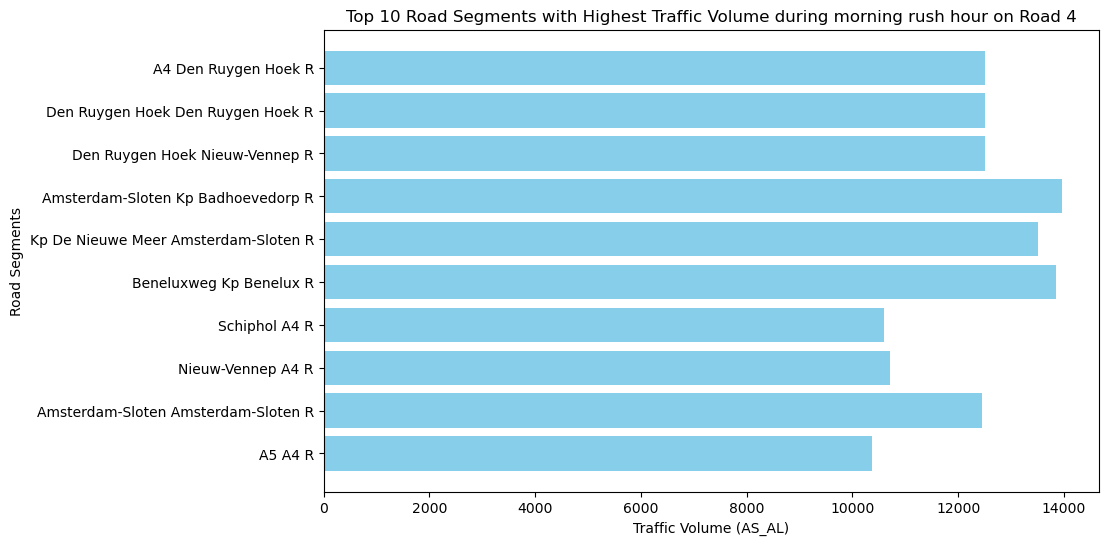

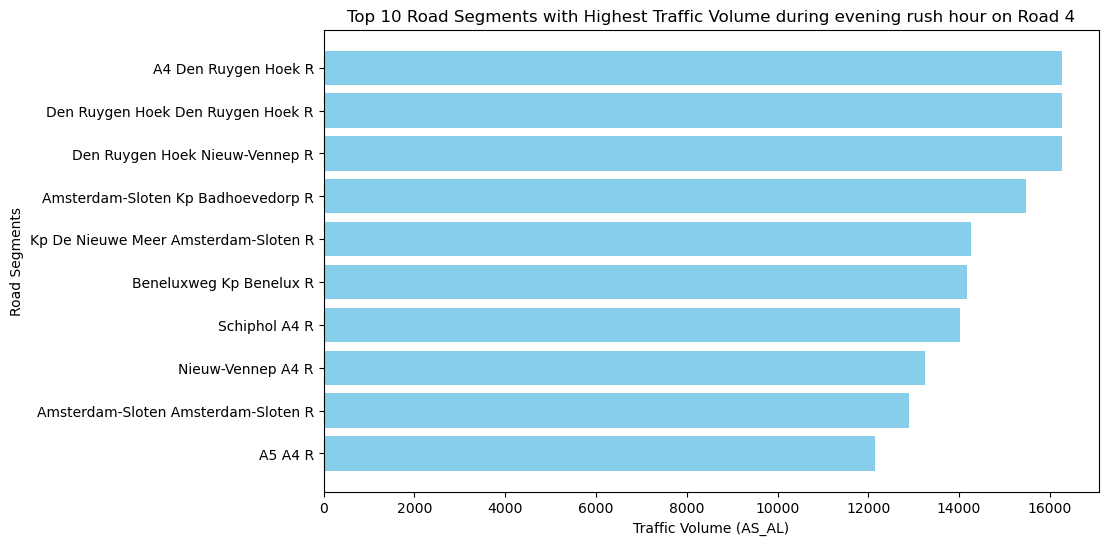

,Wegnr_van,Wegnr_naar,Hm_van,Hm_naar,Traject_van,Traject_naar,etmaal_AL,OS_AL,AS_AL,Ri_naar,Baantype_naar,Baantype_van,Traject,HM
7613,4.0,4.0,13678.0,14560,A4,Den Ruygen Hoek,107000,12504,16263,R,HR,HR,A4 Den Ruygen Hoek R,13678 14560
7608,4.0,4.0,14560.0,15326,Den Ruygen Hoek,Den Ruygen Hoek,107000,12504,16263,R,HR,HR,Den Ruygen Hoek Den Ruygen Hoek R,14560 15326
7595,4.0,4.0,15326.0,16674,Den Ruygen Hoek,Nieuw-Vennep,107000,12504,16263,R,HR,HR,Den Ruygen Hoek Nieuw-Vennep R,15326 16674
2082,4.0,4.0,2752.0,3390,Amsterdam-Sloten,Kp Badhoevedorp,103600,13959,15482,R,HR,HR,Amsterdam-Sloten Kp Badhoevedorp R,2752 3390
2142,4.0,4.0,1419.0,1851,Kp De Nieuwe Meer,Amsterdam-Sloten,99700,13512,14267,R,HR,HR,Kp De Nieuwe Meer Amsterdam-Sloten R,1419 1851
818,4.0,4.0,74575.0,75252,Beneluxweg,Kp Benelux,94500,13849,14169,R,HR,HR,Beneluxweg Kp Benelux R,74575 75252
1931,4.0,4.0,9072.0,9865,Schiphol,A4,84700,10591,14021,R,HR,HR,Schiphol A4 R,9072 9865
1588,4.0,4.0,16674.0,18186,Nieuw-Vennep,A4,89800,10711,13253,R,HR,HR,Nieuw-Vennep A4 R,16674 18186
2128,4.0,4.0,1851.0,2752,Amsterdam-Sloten,Amsterdam-Sloten,90700,12445,12888,R,HR,HR,Amsterdam-Sloten Amsterdam-Sloten R,1851 2752
1735,4.0,4.0,10796.0,13678,A5,A4,85200,10361,12148,R,HR,HR,A5 A4 R,10796 13678


In [29]:
data = pd.read_excel('datasets_spitsuren_wegvakken/INWEVA_2019_spits.xlsx')

selected_columns = data[[ 'Wegnr_van','Wegnr_naar','Hm_van','Hm_naar','Traject_van', 'Traject_naar', 'etmaal_AL', 'OS_AL',
                          'AS_AL','Ri_naar' , 'Baantype_naar', 'Baantype_van']]
selected_columns['Hm_van'] = pd.to_numeric(selected_columns['Hm_van'], errors='coerce')

selected_columns['Traject'] = data['Traject_van'].astype(str) + ' ' + data['Traject_naar'].astype(str) + ' ' + data['Ri_naar'].astype(str)
selected_columns['HM'] = data['Hm_van'].astype(str) + ' ' + data['Hm_naar'].astype(str)
df_road_4 = selected_columns[ (selected_columns['Wegnr_van'] == 4) & (selected_columns['Wegnr_naar'] == 4) & 
                             (selected_columns['Baantype_naar'] == 'HR') & (selected_columns['Baantype_van'] == 'HR') & 
                              (selected_columns['Ri_naar'] == 'R') & (selected_columns['Hm_van']<= 150000)] 
df_road_4_sorted = df_road_4.sort_values(by='AS_AL', ascending=False)



df_road_4_sorted.head(20)

plt.figure(figsize=(10,6))
plt.barh(df_road_4_sorted['Traject'].head(10), df_road_4_sorted['OS_AL'].head(10), color='skyblue')
plt.xlabel('Traffic Volume (AS_AL)')
plt.ylabel('Road Segments')
plt.title('Top 10 Road Segments with Highest Traffic Volume during morning rush hour on Road 4')
plt.gca().invert_yaxis()
plt.show()

plt.figure(figsize=(10,6))
plt.barh(df_road_4_sorted['Traject'].head(10), df_road_4_sorted['AS_AL'].head(10), color='skyblue')
plt.xlabel('Traffic Volume (AS_AL)')
plt.ylabel('Road Segments')
plt.title('Top 10 Road Segments with Highest Traffic Volume during evening rush hour on Road 4')
plt.gca().invert_yaxis()
plt.show()
df_road_4_sorted.head(10)

In [22]:
import pandas as pd

# List of file paths for the datasets for each year (2012 to 2019)
data_files = {
    2012: 'datasets_spitsuren_wegvakken/INWEVA_2012_spits.xlsx',
    2013: 'datasets_spitsuren_wegvakken/INWEVA_2013_spits.xlsx',
    2014: 'datasets_spitsuren_wegvakken/INWEVA_2014_spits.xlsx',
    2015: 'datasets_spitsuren_wegvakken/INWEVA_2015_spits.xlsx',
    2016: 'datasets_spitsuren_wegvakken/INWEVA_2016_spits.xlsx',
    2017: 'datasets_spitsuren_wegvakken/INWEVA_2017_spits.xlsx',
    2018: 'datasets_spitsuren_wegvakken/INWEVA_2018_spits.xlsx',
    2019: 'datasets_spitsuren_wegvakken/INWEVA_2019_spits.xlsx',
    2020: 'datasets_spitsuren_wegvakken/INWEVA_2020_spits.xlsx',
    2021: 'datasets_spitsuren_wegvakken/INWEVA_2021_spits.xlsx',
    2022: 'datasets_spitsuren_wegvakken/INWEVA_2022_spits.xlsx',
    2023: 'datasets_spitsuren_wegvakken/INWEVA_2023_spits.xlsx',
}

# Initialize an empty list to store results
results = []

# Loop through the datasets
for year, file in data_files.items():
    # Load the dataset for the year
    df = pd.read_excel(file)
    
    # Filter the data for road 4 with HR (Hoofdroute)
    df_road_4HR = df[(df['Wegnr_van'] == 4) & (df["Wegnr_naar"] == 4) & (df['Baantype_naar'] == 'HR') & (df['Baantype_van'] == 'HR')]
    
    # Further filter for Hectometer <= 150,000
    df_road_4HR_HM = df_road_4HR[(df_road_4HR['Hm_van']<= 17500)& (df_road_4HR['Hm_van']>= 11500)
                              & (df_road_4HR['Hm_naar']>= 11500)& (df_road_4HR['Hm_naar']<= 17500)]
    
    # Separate data for 'R' (right) direction
    df_road_4HR_HM_R = df_road_4HR_HM[(df_road_4HR_HM['Ri_van'] == 'R') & (df_road_4HR_HM['Ri_naar'] == 'R')]
    df_road_4HR_HM_L = df_road_4HR_HM[(df_road_4HR_HM['Ri_van'] == 'L') & (df_road_4HR_HM['Ri_naar'] == 'L')]
    
    # Calculate the mean score for OS_AL (morning rush) and AS_AL (afternoon rush)
    mean_score_R_OS_R = (df_road_4HR_HM_R['OS_AL'].mean()) 
    mean_score_R_AS_R = (df_road_4HR_HM_R['AS_AL'].mean()) 

    mean_score_R_OS_L = (df_road_4HR_HM_L['OS_AL'].mean()) 
    mean_score_R_AS_L = (df_road_4HR_HM_L['AS_AL'].mean()) 
    
     # Store the results for the right side OS_AL
    results.append({
        'Year': year,
        'Rush': 'Morning',  # OS represents morning rush hour
        'Direction': 'R',   # Right-hand side
        'Mean Score': mean_score_R_OS_R
    })
    
    results.append({
        'Year': year,
        'Rush': 'Afternoon',  # AS represents afternoon rush hour
        'Direction': 'R',      # Right-hand side
        'Mean Score': mean_score_R_AS_R
    })
    
    # Store the results for the left side
    results.append({
        'Year': year,
        'Rush': 'Morning',  # OS represents morning rush hour
        'Direction': 'L',   # Left-hand side
        'Mean Score': mean_score_R_OS_L
    })
    
    results.append({
        'Year': year,
        'Rush': 'Afternoon',  # AS represents afternoon rush hour
        'Direction': 'L',      # Left-hand side
        'Mean Score': mean_score_R_AS_L
    })

# Convert the results into a DataFrame
df_results = pd.DataFrame(results)

# Export the results to an Excel file

display(df_results)




c:\Users\bartm\anaconda3\envs\TIL6022\Lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,Year,Rush,Direction,Mean Score
0,2012,Morning,R,10186.000000
1,2012,Afternoon,R,16572.000000
2,2012,Morning,L,16959.000000
3,2012,Afternoon,L,10985.000000
4,2013,Morning,R,11110.000000
5,2013,Afternoon,R,17309.000000
6,2013,Morning,L,17994.000000
7,2013,Afternoon,L,11716.000000
8,2014,Morning,R,12071.000000
9,2014,Afternoon,R,18513.000000


In [34]:
import numpy as np

data = pd.read_excel('mean_scores_road4_HR_R_2012_2019.xlsx')
data.head(30)
data['Mean Score']
#a = np.array([data.Year])
#print(a) 

0     7126.833333
1     9209.770833
2     9070.404762
3     7610.547619
4     7842.240000
5     9079.440000
6     9234.543478
7     8471.913043
8     7842.490909
9     8778.454545
10    9693.760000
11    8742.480000
12    7835.000000
13    8589.740741
14    9796.000000
15    8774.640000
16    7931.611111
17    8605.462963
18    9875.680000
19    8915.040000
Name: Mean Score, dtype: float64

In [ ]:
    # Calculate the mean score for OS_AL (morning rush) and AS_AL (afternoon rush) vrachtverkeer
    mean_score_R_OS_R = (df_road_4HR_HM_R['OS_L2'].mean() + df_road_4HR_HM_R['OS_L3'].mean()) / 2 
    mean_score_R_AS_R = (df_road_4HR_HM_R['AS_L2'].mean() + df_road_4HR_HM_R['AS_L3'].mean()) / 2

    mean_score_R_OS_L = (df_road_4HR_HM_L['OS_L2'].mean() + df_road_4HR_HM_L['OS_L3'].mean()) / 2
    mean_score_R_AS_L = (df_road_4HR_HM_L['AS_L2'].mean() + df_road_4HR_HM_L['AS_L3'].mean()) / 2

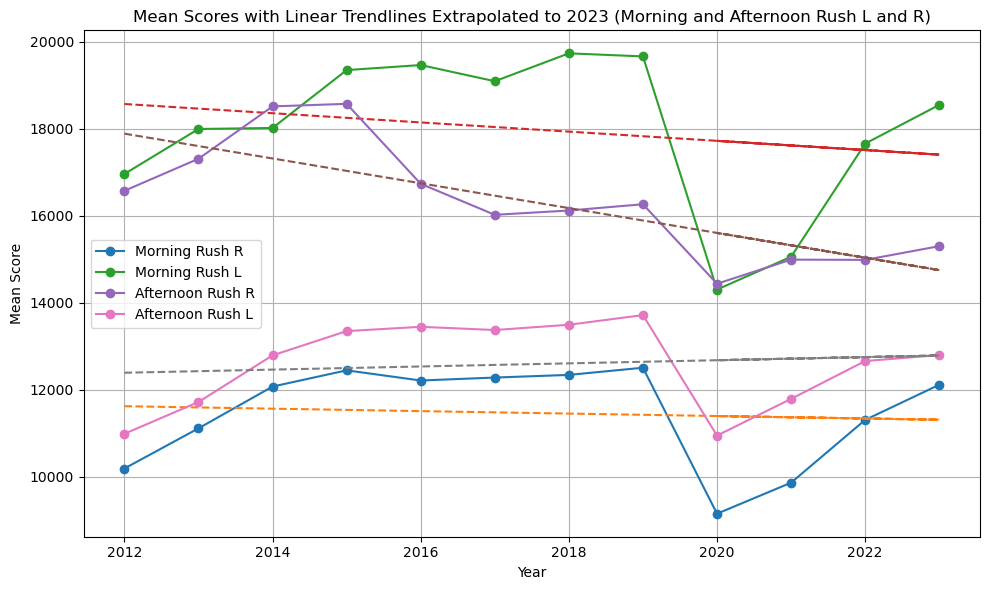

Predicted Morning Rush R mean score for 2023: 11308.72
Predicted Morning Rush L mean score for 2023: 17403.81
Predicted Afternoon Rush R mean score for 2023: 14748.56
Predicted Afternoon Rush L mean score for 2023: 12784.60


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the Excel file
df = df_results

# Pivot the data for easier plotting and trendline calculation
pivot_df = df.pivot_table(index='Year', columns=['Rush', 'Direction'], values='Mean Score')

# Set up the years and extend them to 2023
years = pivot_df.index.values
extended_years = np.append(years, np.array([2020, 2021, 2022, 2023]))  # Extend to 2023

# We'll store predicted values for each combination in a dictionary
predicted_2023 = {}

# Function to fit and predict using a linear trendline
def fit_and_predict_linear_trendline(mean_scores, label):
    # Fit a linear trendline using the original years (up to 2019)
    coefficients = np.polyfit(years, mean_scores, 1)  # 1st-degree polynomial (linear fit)
    
    # Predict the mean scores for the extended years (up to 2023)
    trendline = np.polyval(coefficients, extended_years)
    
    # Predict the mean score for the year 2023
    year_2023 = 2023
    predicted_value = np.polyval(coefficients, year_2023)
    predicted_2023[label] = predicted_value
    
    return trendline

# Plot the original data and linear trendlines
plt.figure(figsize=(10, 6))

for rush, direction in [('Morning', 'R'), ('Morning', 'L'), ('Afternoon', 'R'), ('Afternoon', 'L')]:
    label = f"{rush} Rush {direction}"
    
    # Get the mean scores for the current rush and direction
    mean_scores = pivot_df[(rush, direction)]
    
    # Plot the original data
    plt.plot(years, mean_scores, label=label, marker='o')
    
    # Plot the linear trendline extrapolated to 2023
    linear_trendline = fit_and_predict_linear_trendline(mean_scores, label)
    plt.plot(extended_years, linear_trendline, linestyle='--')

# Add titles and labels
plt.title('Mean Scores with Linear Trendlines Extrapolated to 2023 (Morning and Afternoon Rush L and R)')
plt.xlabel('Year')
plt.ylabel('Mean Score')
plt.legend()

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

# Display the predicted values for 2023
for label, prediction in predicted_2023.items():
    print(f"Predicted {label} mean score for 2023: {prediction:.2f}")


In [14]:
data = pd.read_excel('datasets_spitsuren_wegvakken/INWEVA_2014_spits.xlsx')

selected_columns = data[[ 'Wegnr_van','Wegnr_naar','Hm_van','Hm_naar','Traject_van', 'Traject_naar', 'etmaal_AL', 'OS_AL',
                          'AS_AL','Ri_naar' , 'Baantype_naar', 'Baantype_van']]
selected_columns['Hm_van'] = pd.to_numeric(selected_columns['Hm_van'], errors='coerce')

selected_columns['Traject'] = data['Traject_van'].astype(str) + ' ' + data['Traject_naar'].astype(str) + ' ' + data['Ri_naar'].astype(str)
selected_columns['HM'] = data['Hm_van'].astype(str) + ' ' + data['Hm_naar'].astype(str)
df_road_4 = selected_columns[ (selected_columns['Wegnr_van'] == 4) & (selected_columns['Wegnr_naar'] == 4) & 
                             (selected_columns['Baantype_naar'] == 'HR') & (selected_columns['Baantype_van'] == 'HR') & 
                              (selected_columns['Ri_naar'] == 'R') & (selected_columns['Hm_van']<= 17500)& (selected_columns['Hm_van']>= 11500)
                              & (selected_columns['Hm_naar']>= 11500)& (selected_columns['Hm_naar']<= 17500)] 
#df_road_4HR_HM = df_road_4[(df_road_4HR['Hm_van'] >= 11500) &  (df_road_4HR['Hm_naar'] <= 17500)]
df_road_4_sorted = df_road_4.sort_values(by='AS_AL', ascending=False)


#df_road_4_sorted = df_road_4.sort_values(by='Hm_van', ascending=True)

df_road_4_sorted.head(20)

C:\Users\bartm\AppData\Local\Temp\ipykernel_22112\1757542963.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns['Hm_van'] = pd.to_numeric(selected_columns['Hm_van'], errors='coerce')
C:\Users\bartm\AppData\Local\Temp\ipykernel_22112\1757542963.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns['Traject'] = data['Traject_van'].astype(str) + ' ' + data['Traject_naar'].astype(str) + ' ' + data['Ri_naar'].astype(str)
C:\Users\bartm\AppData\Local\Temp\ipykernel_22112\175754296

,Wegnr_van,Wegnr_naar,Hm_van,Hm_naar,Traject_van,Traject_naar,etmaal_AL,OS_AL,AS_AL,Ri_naar,Baantype_naar,Baantype_van,Traject,HM
1864,4,4.0,13678,16674,Rijksweg A4,RYKSWG,98500,12071,18513,R,HR,HR,Rijksweg A4 RYKSWG R,13678 16674


Expected mean score for 2023 (Morning Rush R): 12851.40
Actual mean score for 2023 (Morning Rush R): 12112.67
Expected mean score for 2023 (Morning Rush L): 20168.80
Actual mean score for 2023 (Morning Rush L): 18548.00
Expected mean score for 2023 (Afternoon Rush R): 15562.60
Actual mean score for 2023 (Afternoon Rush R): 15299.33
Expected mean score for 2023 (Afternoon Rush L): 14015.90
Actual mean score for 2023 (Afternoon Rush L): 12794.00


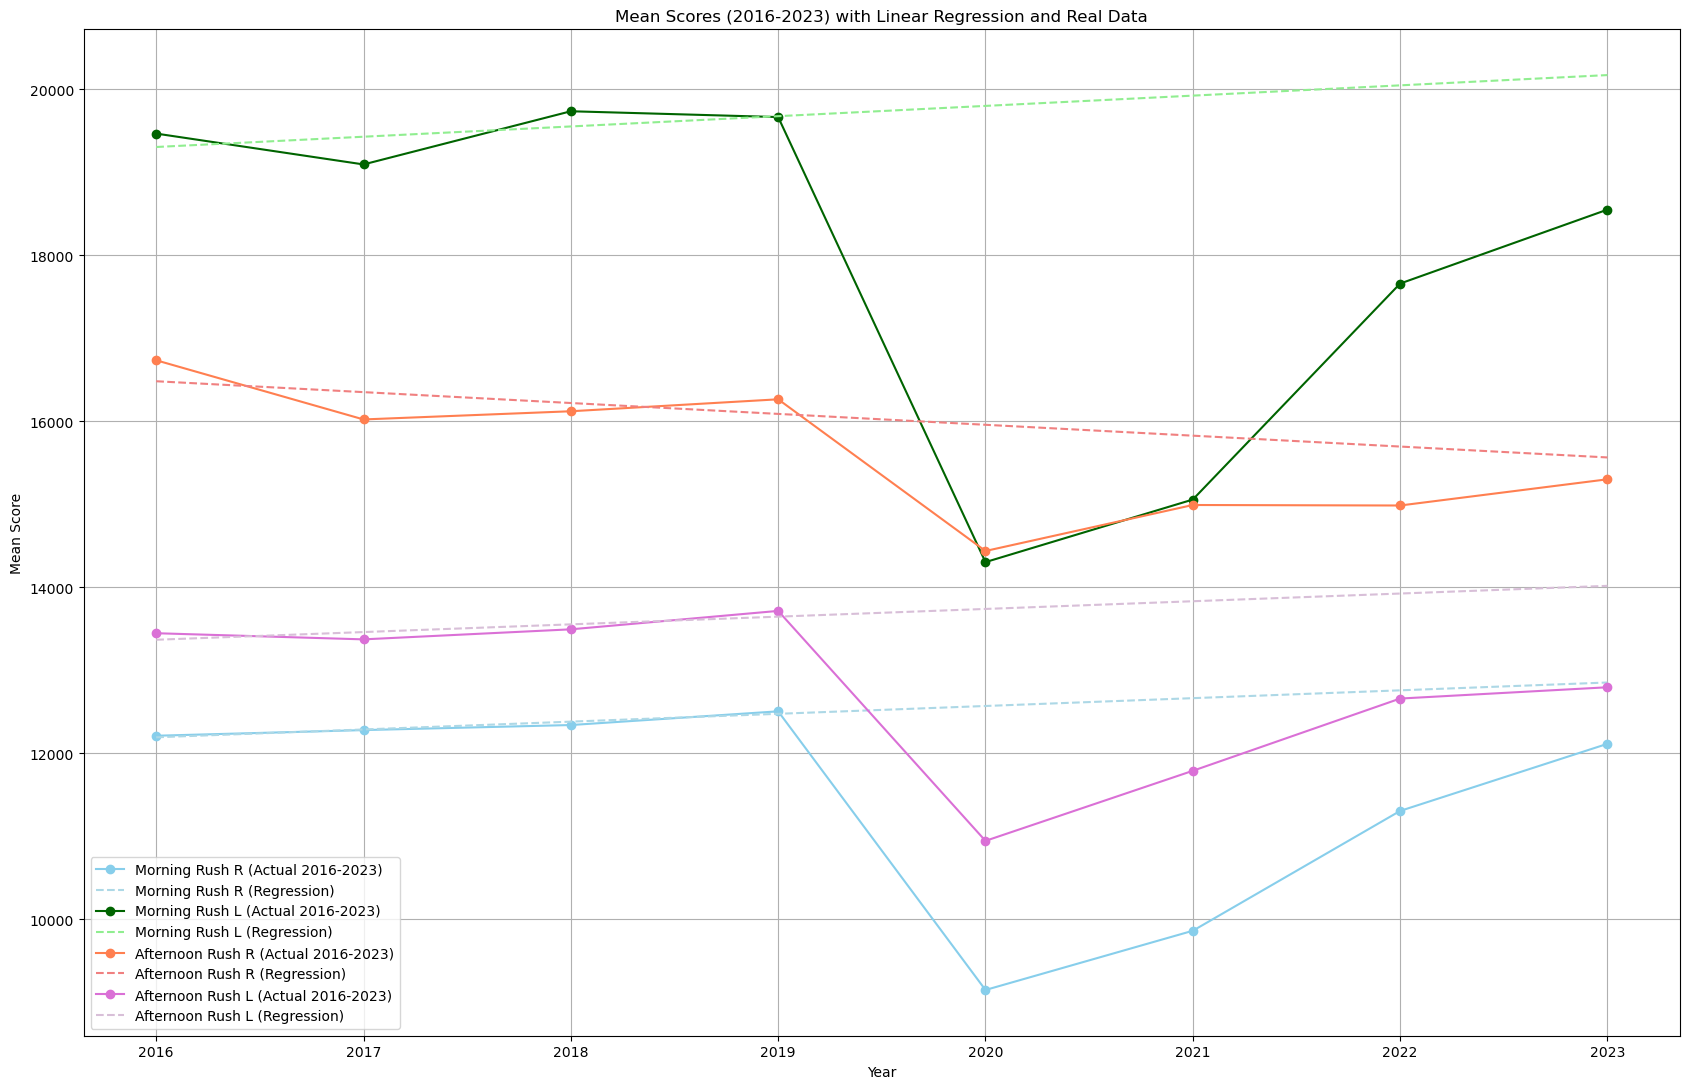


Comparison Results (Expected vs Actual Scores):
    Year       Rush Direction  Expected Score  Actual Score        Delta
0   2020    Morning         R    12568.500000   9147.333333 -3421.166667
4   2020    Morning         L    19797.500000  14301.666667 -5495.833333
12  2020  Afternoon         L    13737.500000  10943.666667 -2793.833333
8   2020  Afternoon         R    15956.000000  14435.666667 -1520.333333
9   2021  Afternoon         R    15824.866667  14989.666667  -835.200000
13  2021  Afternoon         L    13830.300000  11787.666667 -2042.633333
5   2021    Morning         L    19921.266667  15055.333333 -4865.933333
1   2021    Morning         R    12662.800000   9860.666667 -2802.133333
14  2022  Afternoon         L    13923.100000  12658.000000 -1265.100000
10  2022  Afternoon         R    15693.733333  14983.666667  -710.066667
2   2022    Morning         R    12757.100000  11304.333333 -1452.766667
6   2022    Morning         L    20045.033333  17657.333333 -2387.700000
7 

In [28]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# List of file paths for the datasets, including 2020-2023
data_files_extended = {
    2016: 'datasets_spitsuren_wegvakken/INWEVA_2016_spits.xlsx',
    2017: 'datasets_spitsuren_wegvakken/INWEVA_2017_spits.xlsx',
    2018: 'datasets_spitsuren_wegvakken/INWEVA_2018_spits.xlsx',
    2019: 'datasets_spitsuren_wegvakken/INWEVA_2019_spits.xlsx',
    2020: 'datasets_spitsuren_wegvakken/INWEVA_2020_spits.xlsx',
    2021: 'datasets_spitsuren_wegvakken/INWEVA_2021_spits.xlsx',
    2022: 'datasets_spitsuren_wegvakken/INWEVA_2022_spits.xlsx',
    2023: 'datasets_spitsuren_wegvakken/INWEVA_2023_spits.xlsx',
}

# Initialize an empty list to store results for all years (2016-2023)
results_extended = []

# Loop through the datasets for the extended years
for year, file in data_files_extended.items():
    # Load the dataset for the year
    df = pd.read_excel(file)
    
    # Filter the data for road 4 with HR (Hoofdroute) and further conditions
    df_road_4HR = df[(df['Wegnr_van'] == 4) & (df["Wegnr_naar"] == 4) & (df['Baantype_naar'] == 'HR') & (df['Baantype_van'] == 'HR')]
    df_road_4HR_HM = df_road_4HR[(df_road_4HR['Hm_van']<= 17500)& (df_road_4HR['Hm_van']>= 11500)
                              & (df_road_4HR['Hm_naar']>= 11500)& (df_road_4HR['Hm_naar']<= 17500)]
    
    # Separate data for 'R' (right) and 'L' (left) directions
    df_road_4HR_HM_R = df_road_4HR_HM[(df_road_4HR_HM['Ri_van'] == 'R') & (df_road_4HR_HM['Ri_naar'] == 'R')]
    df_road_4HR_HM_L = df_road_4HR_HM[(df_road_4HR_HM['Ri_van'] == 'L') & (df_road_4HR_HM['Ri_naar'] == 'L')]
    
    # Calculate the mean score for OS_AL (morning rush) and AS_AL (afternoon rush) for both directions
    mean_score_R_OS_R = df_road_4HR_HM_R['OS_AL'].mean()
    mean_score_R_AS_R = df_road_4HR_HM_R['AS_AL'].mean()
    mean_score_R_OS_L = df_road_4HR_HM_L['OS_AL'].mean()
    mean_score_R_AS_L = df_road_4HR_HM_L['AS_AL'].mean()
    
    # Store the results for each combination
    results_extended.append({'Year': year, 'Rush': 'Morning', 'Direction': 'R', 'Mean Score': mean_score_R_OS_R})
    results_extended.append({'Year': year, 'Rush': 'Afternoon', 'Direction': 'R', 'Mean Score': mean_score_R_AS_R})
    results_extended.append({'Year': year, 'Rush': 'Morning', 'Direction': 'L', 'Mean Score': mean_score_R_OS_L})
    results_extended.append({'Year': year, 'Rush': 'Afternoon', 'Direction': 'L', 'Mean Score': mean_score_R_AS_L})

# Convert the results into a DataFrame
df_extended = pd.DataFrame(results_extended)

# Prepare for plotting and linear regression
df_recent = df_extended[(df_extended['Year'] >= 2016) & (df_extended['Year'] <= 2019)]

# Prepare for linear regression
years = df_recent['Year'].unique().reshape(-1, 1)  # Reshape for sklearn
all_years = np.arange(2016, 2024).reshape(-1, 1)  # For regression (2016-2023)

# Create a new figure for the graph
plt.figure(figsize=(17, 11))

# Initialize a list to store the comparison results for 2020-2023
comparison_results = []

# Define colors for real values
color_mapping_real = {
    ('Morning', 'R'): 'skyblue',
    ('Afternoon', 'R'): 'coral',
    ('Morning', 'L'): 'darkgreen',  # Changed to dark green for clarity
    ('Afternoon', 'L'): 'orchid'
}

# Define colors for expected values (lighter shades)
color_mapping_expected = {
    ('Morning', 'R'): 'lightblue',
    ('Afternoon', 'R'): 'lightcoral',
    ('Morning', 'L'): 'lightgreen',
    ('Afternoon', 'L'): 'thistle'
}

# Loop through each Rush and Direction combination to plot and perform regression
for rush in ['Morning', 'Afternoon']:
    for direction in ['R', 'L']:
        # Filter data for the specific rush hour and direction (2016-2023)
        df_filtered = df_extended[(df_extended['Rush'] == rush) & (df_extended['Direction'] == direction)]
        
        # Extract the data for linear regression (only for 2016-2019)
        df_recent_filtered = df_recent[(df_recent['Rush'] == rush) & (df_recent['Direction'] == direction)]
        mean_scores = df_recent_filtered['Mean Score'].values
        
        # Perform linear regression on the 2016-2019 data
        reg = LinearRegression().fit(years, mean_scores)
        
        # Predict mean scores from 2016 to 2023
        predicted_scores = reg.predict(all_years)
        
        # Plot real data as a continuous line for 2016-2023 with specified colors
        plt.plot(df_filtered['Year'], df_filtered['Mean Score'], 
                 label=f'{rush} Rush {direction} (Actual 2016-2023)', 
                 color=color_mapping_real[(rush, direction)], marker='o')

        # Plot the linear regression line from 2016 to 2023 with lighter shades
        plt.plot(all_years, predicted_scores, linestyle='--', 
                 label=f'{rush} Rush {direction} (Regression)', 
                 color=color_mapping_expected[(rush, direction)])

        # Collect actual scores for 2020-2023
        actual_scores = df_filtered[df_filtered['Year'] >= 2020]['Mean Score'].values
        
        # Calculate the delta (Actual - Predicted) for 2020-2023 and store in the comparison_results list
        for i, year in enumerate(range(2020, 2023 + 1)):
            expected_score = predicted_scores[i + 4]  # Offset for the predicted scores (2020 is at index 4)
            actual_score = actual_scores[i]
            delta = actual_score - expected_score
            
            # Store the values for this combination
            comparison_results.append({
                'Year': year,
                'Rush': rush,
                'Direction': direction,
                'Expected Score': expected_score,
                'Actual Score': actual_score,
                'Delta': delta
            })
        
        # Print the expected and actual mean score for 2023
        actual_2023 = df_filtered[df_filtered['Year'] == 2023]['Mean Score'].values[0]
        print(f'Expected mean score for 2023 ({rush} Rush {direction}): {predicted_scores[-1]:.2f}')
        print(f'Actual mean score for 2023 ({rush} Rush {direction}): {actual_2023:.2f}')

# Add titles and labels
plt.title('Mean Scores (2016-2023) with Linear Regression and Real Data')
plt.xlabel('Year')
plt.ylabel('Mean Score')
plt.legend(loc='lower left')

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

# Convert comparison results to a DataFrame and sort by Year before printing it
df_comparison = pd.DataFrame(comparison_results).sort_values(by='Year')
print("\nComparison Results (Expected vs Actual Scores):")
print(df_comparison)


In [25]:
data = pd.read_excel('mean_scores_road4_HR_R_2012_2019.xlsx')
data.head(38)


,Year,Rush,Direction,Mean Score
0,2012,Morning,R,4865.486111
1,2012,Afternoon,R,6232.222222
2,2012,Morning,L,5928.235294
3,2012,Afternoon,L,4930.235294
4,2013,Morning,R,5558.046154
5,2013,Afternoon,R,7013.169231
6,2013,Morning,L,6880.406780
7,2013,Afternoon,L,5692.966102
8,2014,Morning,R,5520.048387
9,2014,Afternoon,R,7181.580645
